# 1. Instalar librerias



In [1]:
pip install torch-scatter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=274491 sha256=1c677246736404319a9cdabee151766ff6b006243b1f2a5324866141414011f2
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter


In [2]:
pip install torch-sparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.7 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.15-cp37-cp37m-linux_x86_64.whl size=516860 sha256=bdbb8fbdae5b81f163292af421baa38a7b7465aeed0105e3c78a34f91ab2f1c1
  Stored in directory: /root/.cache/pip/wheels/15/68/4d/1414be5c2c622bad35364e13213180797717b6d4b8923936dc
Successfully built torch-sparse


In [ ]:
pip install torch-geometric

# 2. Crear dataset

In [4]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
genes = pd.read_csv('/content/drive/MyDrive/ART_Inv/Kinase_gene_matrix_X3_131_nodes.csv')
Y = pd.read_csv('/content/drive/MyDrive/ART_Inv/Kinase_gene_matrix_classification.csv')

genes = genes.iloc[:,1:132] 
Y = Y.iloc[:,1:2] 

In [8]:
genes

,AKAP1,AKAP10,AKAP12,AKAP13,AKAP14,AKAP4,AKAP5,AKAP7,AKAP8,AKAP9,...,SKP2,TAB1,TAB2,TAB3,TCEB2,TEC,UBE2M,VCL,XRCC6,ZAP70
0,34.608085,33.496161,33.708977,35.071896,22.030411,21.292506,25.036127,32.352171,32.364362,34.799151,...,32.63417,31.95379,34.91153,31.28668,34.75814,29.68056,33.82521,34.12352,35.24634,31.17945
1,33.991203,33.321684,34.364882,35.360390,22.030411,22.762193,28.279929,32.332165,32.865812,35.333528,...,31.80604,31.26559,35.52924,31.96868,34.38246,30.78769,32.57963,35.34613,35.91455,29.38780
2,33.383751,33.224008,31.941494,35.090412,22.030411,21.292506,29.082875,32.506326,33.310765,34.894155,...,32.78642,31.28554,36.91118,31.50909,34.43952,31.05624,33.20477,34.60666,36.05801,29.53435
3,33.504572,34.388289,33.921804,35.522805,22.030411,24.479975,28.863519,32.080430,32.663189,35.605425,...,31.60685,30.86918,35.41662,32.18003,34.36787,30.20403,33.48316,36.13525,35.75676,29.32770
4,33.960169,32.784996,34.566394,36.050989,22.030411,21.292506,25.036127,25.443711,33.156714,35.929770,...,32.31155,28.88966,36.12132,32.74898,32.50010,27.76103,33.09984,35.03527,36.33015,30.59498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,34.044939,33.310459,34.008777,35.508424,22.537241,21.811701,26.714716,30.997207,33.140357,34.738921,...,31.66193,31.97549,36.17351,31.01873,33.79607,29.74909,33.49762,35.38283,35.53767,29.29301
177,32.418678,34.110995,33.243186,33.134963,22.537241,21.811701,28.895484,33.607378,33.533021,35.944165,...,32.99457,28.61897,36.27230,31.53447,36.19576,31.71446,34.16600,32.78765,35.50224,29.65655
178,33.336106,33.381949,31.526169,35.679063,22.537241,21.811701,28.132297,32.065304,32.283709,35.312405,...,32.86507,30.50706,36.31789,32.47015,33.71158,31.08636,32.68856,35.17108,35.22805,30.95118
179,34.026063,33.764835,33.884949,35.482404,22.537241,21.811701,29.201802,30.616063,34.317215,35.289050,...,32.84061,32.27365,34.55019,32.38527,33.07973,30.64727,32.10466,35.00358,34.81409,30.96574


In [9]:
edge_index = torch.tensor([[ 31,  78, 107,  78, 107, 106,  79, 106,  79, 106,  76, 106,  76,
        33,  30,  55,  30,  33, 107,  55,  79,  55,  79,  55,  49,  55,
        76,  55,  34,  55,  34, 101,  34,  55,  82, 101,  82,  55,  82,
       101,  30,   9,   5,  99,  72,  23,   5,  18,  46,  18,  51,  18,
        51,  18,   5,  23,  46,  18,  46,  18,  46,  23,  46, 130,  72,
       130,   3,  94,  87,  94,   3,  94,  44,  94,  44,  94, 123,  94,
       123,  94,  48,  94,  87,  94,  87,  94,  87,  94,  87,  94,  87,
        94,  87,  94, 115,  94,  83,  94,   4,  94,  88,  94,  88,  94,
        88,  95,  88,  95,  92,  95,  45,  95,  45,  64,  12,  16,  64,
        92,  95,   6,  95,  92,  36,  95,  92,  16,  95,  59,  95,  59,
        16,  95,   2,  53,  95,  39,  53,  95,  56,  36,  95,  38,  36,
        64,  38, 128,  95,  93, 128, 110,  63, 128,  64, 114, 128, 110,
        50, 110,  74,  50, 110,  50, 110,  50, 110,  50, 110,  50, 110,
        50, 110,  50, 110, 122,   8, 122,   8, 122, 110, 122, 121, 111,
        70, 122,   8, 122, 121, 122, 121, 111,  70, 111,  70, 111,  70,
       111,  70, 111,  70, 111,  70, 111,  28, 111,  90, 111,  15, 116,
        90, 111,  28, 111,  90, 116,  90,   1,  90,   1,  81, 116, 100,
       116,  26,   1,  54, 112,   1, 112,  84, 112,  84,  26,  84,  32,
        84,  32,  84,  98,  84,  98,  54,  98,  54,  98,  54,  98,  54,
        98,  54,  98,  54,  20, 120, 118, 120,  86, 120,  86, 120,  86,
       120,  86, 120,  86,  27,  86, 120,  86, 120,  86, 120,  58,  27,
        17,  69,  17,  60, 118,  60,  86,  60,  86,  60,  86,  60,  40,
        60,  40,  60,  20,  60,  71,  60,  71,  69, 104,  69,  71,  69,
        71,  69,  71,  69,  31,  57,  14,  62,  14,  62,  14, 127,  89,
        85,  89,  85,  89,  69,  89,  69,  89,  69,  61,  62, 103,  62,
        89,  62,  89,  62,  89,  62,  22, 127,  52, 127,  52, 127,  52,
        85,  31,  85,  13,  85,  31,  85,  13,  85, 107,  85,   9,  19,
        20,  72,  21,  73,  93,  87,  94,  76,  92, 102,  95,  80,  55,
        29,  31,  73,  32,  29, 114,   9,  32,  88,  97,  39,  25,  48,
       115,  44,  39,  45,  31,  46,  58,  91,  48,  92, 113,  83,  76,
        72,  87,   4,  96,  29,  22,  87, 110,  37, 119,  38, 130,  35,
       108,  92,  10,  38,  31,  35,  19,  12,  26,  47,  31,  73,  19,
        87,   6,  93,   9,  88,  92,  48,   7, 123,  82,  48,   0, 124,
        88, 124,  95,   4,  90,  77,   8,   6,   4,  88,  79,   0,  89,
        92,  98, 113,  87,  91,  93,  88,  86,   6,   5,  93,   3,  92,
        86,   0,  92,   6,  79,  37,  93, 119, 118,  11,  82,  68,  93,
         4,  96,  89,   7,  58,  87,   0,  12,   8,  38,   6,  35,  17,
         3,  96,  45,  88,  35,  66,   0,  67,  44,   9,  63,  43, 104,
        39, 107,  98,   0,  50,  70,  35,  31, 112, 113, 110, 108,  55,
        31,  73,  32, 109, 114,  72,  33,  30,  31,  75, 113,  71, 107,
        73, 115,  29,  48,  87, 123,  89, 124, 107, 105,  22,  22,  29,
        54,  88,  44,  20,  52,  26,  26,  73, 125,  71,  69,  30,  24,
        31, 127, 107,  23,  72,  20,  22,  28,  86,  10,  12,  68,  82,
       120,  10, 121,  83, 118,  92,  93,  89,  94,  76, 112, 102,  76,
        24,  95,  34, 118,  92,  22,  83,  68,  89,  22,  91,  39,  90,
        29,  85,  96,  82,  87,  52, 117,  65,  89, 105,  88,  67,   9,
        37,  79,  66,  21,  22, 117,  69,   6, 127,  77,  23,  89,  28,
        87,  10,   5, 126,  82, 121,   0,  20,  88,  24, 102, 109,  83,
        20,  12,  41,  68,  59,   4,  42,  93,  51,  92,  61,  38,  63,
        59,  62,  22,  38,  29,  40,  72, 127, 129, 125,  73,  26, 107,
        24,  30,  22, 107,  67,  12, 107,  11,  31,  13,  20,   3,  89,
         9,  91,  87, 121,  83,  23,  92,  10,  34,  46,   3,  35,  79,
        51,  82,  59,  88,  61,  10, 121,  66,  24,  65,  22,  67,  94,
        30,  86,  12,  82, 108,  90,  11,  83,  30,  92,  88],
                          [ 19,  20,  72,  21,  73,  93,  87,  94,  76,  92, 102,  95,  80,
        55,  29,  31,  73,  32,  29, 114,   9,  32,  88,  97,  39,  25,
        48, 115,  44,  39,  45,  31,  46,  58,  91,  48,  92, 113,  83,
        76,  72,  87,   4,  96,  29,  22,  87, 110,  37, 119,  38, 130,
        35, 108,  92,  10,  38,  31,  35,  19,  12,  26,  47,  31,  73,
        19,  87,   6,  93,   9,  88,  92,  48,   7, 123,  82,  48,   0,
       124,  88, 124,  95,   4,  90,  77,   8,   6,   4,  88,  79,   0,
        89,  92,  98, 113,  87,  91,  93,  88,  86,   6,   5,  93,   3,
        92,  86,   0,  92,   6,  79,  37,  93, 119, 118,  11,  82,  68,
        93,   4,  96,  89,   7,  58,  87,   0,  12,   8,  38,   6,  35,
        17,   3,  96,  45,  88,  35,  66,   0,  67,  44,   9,  63,  43,
       104,  39, 107,  98,   0,  50,  70,  35,  31, 112, 113, 110, 108,
        55,  31,  73,  32, 109, 114,  72,  33,  30,  31,  75, 113,  71,
       107,  73, 115,  29,  48,  87, 123,  89, 124, 107, 105,  22,  22,
        29,  54,  88,  44,  20,  52,  26,  26,  73, 125,  71,  69,  30,
        24,  31, 127, 107,  23,  72,  20,  22,  28,  86,  10,  12,  68,
        82, 120,  10, 121,  83, 118,  92,  93,  89,  94,  76, 112, 102,
        76,  24,  95,  34, 118,  92,  22,  83,  68,  89,  22,  91,  39,
        90,  29,  85,  96,  82,  87,  52, 117,  65,  89, 105,  88,  67,
         9,  37,  79,  66,  21,  22, 117,  69,   6, 127,  77,  23,  89,
        28,  87,  10,   5, 126,  82, 121,   0,  20,  88,  24, 102, 109,
        83,  20,  12,  41,  68,  59,   4,  42,  93,  51,  92,  61,  38,
        63,  59,  62,  22,  38,  29,  40,  72, 127, 129, 125,  73,  26,
       107,  24,  30,  22, 107,  67,  12, 107,  11,  31,  13,  20,   3,
        89,   9,  91,  87, 121,  83,  23,  92,  10,  34,  46,   3,  35,
        79,  51,  82,  59,  88,  61,  10, 121,  66,  24,  65,  22,  67,
        94,  30,  86,  12,  82, 108,  90,  11,  83,  30,  92,  88,  31,
        78, 107,  78, 107, 106,  79, 106,  79, 106,  76, 106,  76,  33,
        30,  55,  30,  33, 107,  55,  79,  55,  79,  55,  49,  55,  76,
        55,  34,  55,  34, 101,  34,  55,  82, 101,  82,  55,  82, 101,
        30,   9,   5,  99,  72,  23,   5,  18,  46,  18,  51,  18,  51,
        18,   5,  23,  46,  18,  46,  18,  46,  23,  46, 130,  72, 130,
         3,  94,  87,  94,   3,  94,  44,  94,  44,  94, 123,  94, 123,
        94,  48,  94,  87,  94,  87,  94,  87,  94,  87,  94,  87,  94,
        87,  94, 115,  94,  83,  94,   4,  94,  88,  94,  88,  94,  88,
        95,  88,  95,  92,  95,  45,  95,  45,  64,  12,  16,  64,  92,
        95,   6,  95,  92,  36,  95,  92,  16,  95,  59,  95,  59,  16,
        95,   2,  53,  95,  39,  53,  95,  56,  36,  95,  38,  36,  64,
        38, 128,  95,  93, 128, 110,  63, 128,  64, 114, 128, 110,  50,
       110,  74,  50, 110,  50, 110,  50, 110,  50, 110,  50, 110,  50,
       110,  50, 110, 122,   8, 122,   8, 122, 110, 122, 121, 111,  70,
       122,   8, 122, 121, 122, 121, 111,  70, 111,  70, 111,  70, 111,
        70, 111,  70, 111,  70, 111,  28, 111,  90, 111,  15, 116,  90,
       111,  28, 111,  90, 116,  90,   1,  90,   1,  81, 116, 100, 116,
        26,   1,  54, 112,   1, 112,  84, 112,  84,  26,  84,  32,  84,
        32,  84,  98,  84,  98,  54,  98,  54,  98,  54,  98,  54,  98,
        54,  98,  54,  20, 120, 118, 120,  86, 120,  86, 120,  86, 120,
        86, 120,  86,  27,  86, 120,  86, 120,  86, 120,  58,  27,  17,
        69,  17,  60, 118,  60,  86,  60,  86,  60,  86,  60,  40,  60,
        40,  60,  20,  60,  71,  60,  71,  69, 104,  69,  71,  69,  71,
        69,  71,  69,  31,  57,  14,  62,  14,  62,  14, 127,  89,  85,
        89,  85,  89,  69,  89,  69,  89,  69,  61,  62, 103,  62,  89,
        62,  89,  62,  89,  62,  22, 127,  52, 127,  52, 127,  52,  85,
        31,  85,  13,  85,  31,  85,  13,  85, 107,  85,   9]], dtype=torch.int64)

In [10]:
list_data=[]

for g in range(181):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    a.append(i*10)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float)
  x = torch.reshape(x, (-1,))
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g].to_numpy()], dtype=torch.float)
  data = Data(x=x, edge_index=edge_index, y=y)
  list_data.append(data)

print(list_data)

[Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700], y=[1, 1]), Data(x=[131], edge_index=[2, 700]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  if sys.path[0] == '':


# 3. Dibujar grafo

In [11]:
def plot_graph(data,description=True):
    edges_raw = data.edge_index.numpy()
    edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
    labels = data.x.numpy()
    G = nx.Graph()
    print(G)
    G.add_nodes_from(list(range(np.max(edges_raw))))
    G.add_edges_from(edges)
    plt.subplot(111)
    options = {
       'node_size': 100,
       'width': 1,
    }
    nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
    plt.show()

In [12]:
print("Algunas estadísticas del grafo:")
print(f'Número de Características: {data.num_features}')
print(f'Número de Nodos: {data.num_nodes}')
print(f'Número de bordes: {data.num_edges}')
print(f'Grado promedio de nodos: {data.num_edges / data.num_nodes:.2f}')
print(f'¿Contiene nodos aislados?: {data.contains_isolated_nodes()}')
print(f'¿Contiene autoloops?: {data.contains_self_loops()}')
print(f'¿Es no dirigido?: {data.is_undirected()}')

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


Algunas estadísticas del grafo:
Número de Características: 1
Número de Nodos: 131
Número de bordes: 700
Grado promedio de nodos: 5.34
¿Contiene nodos aislados?: False
¿Contiene autoloops?: False
¿Es no dirigido?: True


Graph with 0 nodes and 0 edges


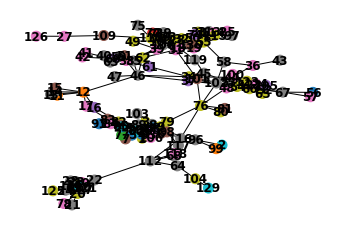

In [13]:
plot_graph(data,True)

# 4. Modelo

In [14]:
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import remove_self_loops, add_self_loops


class SAGEConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(SAGEConv, self).__init__(aggr='max')
        self.lin = torch.nn.Linear(in_channels, out_channels)
        self.act = torch.nn.ReLU()
        self.update_lin = torch.nn.Linear(in_channels + out_channels, in_channels, bias=False)
        self.update_act = torch.nn.ReLU()

    def forward(self, x, edge_index):
        edge_index, _ = remove_self_loops(edge_index)
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)

    def message(self, x_j):
        x_j = self.lin(x_j)
        x_j = self.act(x_j)

        return x_j

    def update(self, aggr_out, x):
        new_embedding = torch.cat([aggr_out, x], dim=1)
        new_embedding = self.update_lin(new_embedding)
        new_embedding = self.update_act(new_embedding)
        return new_embedding


In [15]:
embed_dim = 131
import torch
import torch.nn.functional as F
from torch_geometric.nn import TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = SAGEConv(embed_dim,131)
        self.pool1 = TopKPooling(131, ratio=0.8)
        self.conv2 = SAGEConv(131, 131)
        self.pool2 = TopKPooling(131, ratio=0.8)
        self.item_embedding = torch.nn.Embedding(num_embeddings=393, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(262, 65)
        self.lin3 = torch.nn.Linear(65, 1)
        self.act1 = torch.nn.ReLU()
        print(self)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = torch.tensor(x).to(torch.int)
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))

        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = F.relu(self.conv2(x, edge_index))

        x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 + x2

        x = self.lin1(x)
        x = self.act1(x)

        x = F.dropout(x, p=0.5, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)

        return x

# 5. New attempt

In [16]:
class AverageMeter(object):
    """
    Keeps track of most recent, average, sum, and count of a metric.
    """

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [17]:
from sklearn.metrics import roc_auc_score
def evaluate(loader, model):
    model.eval()  
    predictions = []
    labels = []

    # Batches
    for data in loader:
        data = data
        pred = model(data).detach().numpy()
        label = data.y.detach().numpy()
        label = label.squeeze(1)
        predictions.append(pred)
        labels.append(label)

    return roc_auc_score(labels, predictions)

In [29]:
from torch import nn
def train_net():
    torch.manual_seed(7)
    np.random.seed(7)
    best_acc = 0

    model = Net()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    model = model

    # Loss function
    criterion = nn.BCELoss()

    train_loader = list_data[0:144]
    test_loader = list_data[145:182]
    # val_loader = list_data[172:182]

    # Epochs
    for epoch in range(0,35):
        train_loss = train(train_loader=train_loader,
                           model=model,
                           criterion=criterion,
                           optimizer=optimizer,
                           epoch=epoch)


        train_acc = evaluate(train_loader, model)
        # val_acc = evaluate(val_loader, model)
        test_acc = evaluate(test_loader, model)
        print('Epoch: {:03d}, Loss: {:.5f}, Train Auc: {:.5f},  Test Auc: {:.5f}'.
              format(epoch, train_loss, train_acc,  test_acc))


In [22]:
def clip_gradient(optimizer, grad_clip):
    """
    Clips gradients computed during backpropagation to avoid explosion of gradients.
    :param optimizer: optimizer with the gradients to be clipped
    :param grad_clip: clip value
    """
    for group in optimizer.param_groups:
        for param in group['params']:
            if param.grad is not None:
                param.grad.data.clamp_(-grad_clip, grad_clip)

In [23]:
def train(train_loader, model, criterion, optimizer, epoch):
    model.train()  

    losses = AverageMeter()

    # Batches
    for i, data in enumerate(train_loader):
        data = data
        label = data.y
        label = label.squeeze(1)

        # Forward prop.
        out = model(data)

        # Calculate loss
        loss = criterion(out, label)

        # Back prop.
        optimizer.zero_grad()
        loss.backward()

        # Clip gradients
        clip_gradient(optimizer, 5)

        # Update weights
        optimizer.step()

        # Keep track of metrics
        losses.update(loss.item())

        # Print status
        step = 20
        if i % step == 0:
            status = 'Epoch: [{0}][{1}/{2}]\t' \
                     'Loss {loss.val:.5f} ({loss.avg:.5f})\t'.format(epoch, i,
                                                                     len(train_loader),
                                                                     loss=losses)
            # print(status)

    return losses.avg

In [30]:
loss = train_net() #80-20

Net(
  (conv1): SAGEConv()
  (pool1): TopKPooling(131, ratio=0.8, multiplier=1.0)
  (conv2): SAGEConv()
  (pool2): TopKPooling(131, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(393, 131)
  (lin1): Linear(in_features=262, out_features=65, bias=True)
  (lin3): Linear(in_features=65, out_features=1, bias=True)
  (act1): ReLU()
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 000, Loss: 0.71225, Train Auc: 0.56105,  Test Auc: 0.61250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 001, Loss: 0.71935, Train Auc: 0.69387,  Test Auc: 0.41875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 002, Loss: 0.69179, Train Auc: 0.72678,  Test Auc: 0.49062


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 003, Loss: 0.69351, Train Auc: 0.75346,  Test Auc: 0.53437


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 004, Loss: 0.68952, Train Auc: 0.78033,  Test Auc: 0.50000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 005, Loss: 0.69036, Train Auc: 0.81772,  Test Auc: 0.49063


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 006, Loss: 0.68932, Train Auc: 0.80818,  Test Auc: 0.54688


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 007, Loss: 0.69128, Train Auc: 0.80156,  Test Auc: 0.50313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 008, Loss: 0.68847, Train Auc: 0.78364,  Test Auc: 0.38750


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 009, Loss: 0.68772, Train Auc: 0.82103,  Test Auc: 0.45937


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 010, Loss: 0.69132, Train Auc: 0.72191,  Test Auc: 0.48750


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 011, Loss: 0.69306, Train Auc: 0.82181,  Test Auc: 0.50313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 012, Loss: 0.68224, Train Auc: 0.83096,  Test Auc: 0.47187


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 013, Loss: 0.67569, Train Auc: 0.85258,  Test Auc: 0.47500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 014, Loss: 0.64156, Train Auc: 0.87439,  Test Auc: 0.41875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 015, Loss: 0.60524, Train Auc: 0.90964,  Test Auc: 0.46875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 016, Loss: 0.55774, Train Auc: 0.93223,  Test Auc: 0.50313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 017, Loss: 0.45264, Train Auc: 0.94684,  Test Auc: 0.49375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 018, Loss: 0.43308, Train Auc: 0.94917,  Test Auc: 0.45312


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 019, Loss: 0.42032, Train Auc: 0.95755,  Test Auc: 0.45938


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 020, Loss: 0.39477, Train Auc: 0.94567,  Test Auc: 0.43125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 021, Loss: 0.39941, Train Auc: 0.96767,  Test Auc: 0.40625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 022, Loss: 0.33776, Train Auc: 0.97527,  Test Auc: 0.46250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 023, Loss: 0.25840, Train Auc: 0.98286,  Test Auc: 0.42188


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 024, Loss: 0.29959, Train Auc: 0.98247,  Test Auc: 0.50000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 025, Loss: 0.23223, Train Auc: 0.98793,  Test Auc: 0.46563


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 026, Loss: 0.22917, Train Auc: 0.98520,  Test Auc: 0.60938


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 027, Loss: 0.21444, Train Auc: 0.99124,  Test Auc: 0.50313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 028, Loss: 0.19199, Train Auc: 0.99182,  Test Auc: 0.51562


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 029, Loss: 0.25520, Train Auc: 0.99163,  Test Auc: 0.53438


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 030, Loss: 0.14518, Train Auc: 0.99825,  Test Auc: 0.57812


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 031, Loss: 0.22635, Train Auc: 0.99883,  Test Auc: 0.58437


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 032, Loss: 0.11506, Train Auc: 0.99864,  Test Auc: 0.55312


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 033, Loss: 0.15187, Train Auc: 0.99864,  Test Auc: 0.52812


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 034, Loss: 0.10658, Train Auc: 0.99961,  Test Auc: 0.54375


In [25]:
from torch import nn
def train_net():
    torch.manual_seed(7)
    np.random.seed(7)
    best_acc = 0

    model = Net()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    model = model

    # Loss function
    criterion = nn.BCELoss()

    train_loader = list_data[0:154]
    test_loader = list_data[155:182]
    # val_loader = list_data[172:182]

    # Epochs
    for epoch in range(0, 35):
        train_loss = train(train_loader=train_loader,
                           model=model,
                           criterion=criterion,
                           optimizer=optimizer,
                           epoch=epoch)


        train_acc = evaluate(train_loader, model)
        # val_acc = evaluate(val_loader, model)
        test_acc = evaluate(test_loader, model)
        print('Epoch: {:03d}, Loss: {:.5f}, Train Auc: {:.5f},  Test Auc: {:.5f}'.
              format(epoch, train_loss, train_acc,  test_acc))


In [26]:
loss = train_net() #85-15

Net(
  (conv1): SAGEConv()
  (pool1): TopKPooling(131, ratio=0.8, multiplier=1.0)
  (conv2): SAGEConv()
  (pool2): TopKPooling(131, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(393, 131)
  (lin1): Linear(in_features=262, out_features=65, bias=True)
  (lin3): Linear(in_features=65, out_features=1, bias=True)
  (act1): ReLU()
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 000, Loss: 0.70902, Train Auc: 0.59255,  Test Auc: 0.50694


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 001, Loss: 0.71672, Train Auc: 0.61571,  Test Auc: 0.46528


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 002, Loss: 0.68781, Train Auc: 0.69103,  Test Auc: 0.53472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 003, Loss: 0.68682, Train Auc: 0.75879,  Test Auc: 0.45833


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 004, Loss: 0.68651, Train Auc: 0.76334,  Test Auc: 0.44444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 005, Loss: 0.68765, Train Auc: 0.73803,  Test Auc: 0.40278


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 006, Loss: 0.68568, Train Auc: 0.79207,  Test Auc: 0.49306


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 007, Loss: 0.68728, Train Auc: 0.79165,  Test Auc: 0.54861


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 008, Loss: 0.68546, Train Auc: 0.79482,  Test Auc: 0.40278


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 009, Loss: 0.68842, Train Auc: 0.69480,  Test Auc: 0.36806


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 010, Loss: 0.68656, Train Auc: 0.79293,  Test Auc: 0.53472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 011, Loss: 0.68195, Train Auc: 0.81369,  Test Auc: 0.41667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 012, Loss: 0.70834, Train Auc: 0.56888,  Test Auc: 0.48611


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 013, Loss: 0.68760, Train Auc: 0.76222,  Test Auc: 0.50694


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 014, Loss: 0.69138, Train Auc: 0.69978,  Test Auc: 0.23611


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 015, Loss: 0.67409, Train Auc: 0.78916,  Test Auc: 0.36111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 016, Loss: 0.66591, Train Auc: 0.80528,  Test Auc: 0.33333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 017, Loss: 0.65478, Train Auc: 0.82690,  Test Auc: 0.34722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 018, Loss: 0.64917, Train Auc: 0.82038,  Test Auc: 0.32639


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 019, Loss: 0.65302, Train Auc: 0.78092,  Test Auc: 0.41667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 020, Loss: 0.67647, Train Auc: 0.64179,  Test Auc: 0.21528


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 021, Loss: 0.63203, Train Auc: 0.82330,  Test Auc: 0.48611


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 022, Loss: 0.63315, Train Auc: 0.84440,  Test Auc: 0.38194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 023, Loss: 0.55994, Train Auc: 0.87940,  Test Auc: 0.40972


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 024, Loss: 0.52362, Train Auc: 0.92949,  Test Auc: 0.34722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 025, Loss: 0.45737, Train Auc: 0.95334,  Test Auc: 0.32639


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 026, Loss: 0.37516, Train Auc: 0.97324,  Test Auc: 0.33333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 027, Loss: 0.30559, Train Auc: 0.97135,  Test Auc: 0.33333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 028, Loss: 0.30865, Train Auc: 0.98147,  Test Auc: 0.43056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 029, Loss: 0.25778, Train Auc: 0.99657,  Test Auc: 0.43056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 030, Loss: 0.27139, Train Auc: 0.99674,  Test Auc: 0.38194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 031, Loss: 0.15738, Train Auc: 0.99966,  Test Auc: 0.41667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 032, Loss: 0.10497, Train Auc: 1.00000,  Test Auc: 0.41667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 033, Loss: 0.03424, Train Auc: 1.00000,  Test Auc: 0.43056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 034, Loss: 0.02138, Train Auc: 1.00000,  Test Auc: 0.40972


In [27]:
from torch import nn
def train_net():
    torch.manual_seed(7)
    np.random.seed(7)
    best_acc = 0

    model = Net()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    model = model

    # Loss function
    criterion = nn.BCELoss()

    train_loader = list_data[0:163]
    test_loader = list_data[164:182]
    # val_loader = list_data[172:182]

    # Epochs
    for epoch in range(0, 40):
        train_loss = train(train_loader=train_loader,
                           model=model,
                           criterion=criterion,
                           optimizer=optimizer,
                           epoch=epoch)


        train_acc = evaluate(train_loader, model)
        # val_acc = evaluate(val_loader, model)
        test_acc = evaluate(test_loader, model)
        print('Epoch: {:03d}, Loss: {:.5f}, Train Auc: {:.5f},  Test Auc: {:.5f}'.
              format(epoch, train_loss, train_acc,  test_acc))


In [28]:
loss = train_net() #90-10

Net(
  (conv1): SAGEConv()
  (pool1): TopKPooling(131, ratio=0.8, multiplier=1.0)
  (conv2): SAGEConv()
  (pool2): TopKPooling(131, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(393, 131)
  (lin1): Linear(in_features=262, out_features=65, bias=True)
  (lin3): Linear(in_features=65, out_features=1, bias=True)
  (act1): ReLU()
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 000, Loss: 0.72109, Train Auc: 0.55328,  Test Auc: 0.59615


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 001, Loss: 0.70070, Train Auc: 0.65064,  Test Auc: 0.15385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 002, Loss: 0.69199, Train Auc: 0.73377,  Test Auc: 0.19231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 003, Loss: 0.68190, Train Auc: 0.77863,  Test Auc: 0.13462


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 004, Loss: 0.69925, Train Auc: 0.81032,  Test Auc: 0.23077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 005, Loss: 0.68410, Train Auc: 0.83925,  Test Auc: 0.21154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 006, Loss: 0.68531, Train Auc: 0.86941,  Test Auc: 0.28846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 007, Loss: 0.68546, Train Auc: 0.86513,  Test Auc: 0.30769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 008, Loss: 0.68512, Train Auc: 0.87921,  Test Auc: 0.44231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 009, Loss: 0.66413, Train Auc: 0.85242,  Test Auc: 0.30769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 010, Loss: 0.67921, Train Auc: 0.84798,  Test Auc: 0.50000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 011, Loss: 0.64930, Train Auc: 0.84966,  Test Auc: 0.53846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 012, Loss: 0.68275, Train Auc: 0.84982,  Test Auc: 0.61538


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 013, Loss: 0.57848, Train Auc: 0.89100,  Test Auc: 0.65385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 014, Loss: 0.50335, Train Auc: 0.92131,  Test Auc: 0.59615


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 015, Loss: 0.48335, Train Auc: 0.91871,  Test Auc: 0.59615


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 016, Loss: 0.45618, Train Auc: 0.95729,  Test Auc: 0.67308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 017, Loss: 0.41920, Train Auc: 0.96999,  Test Auc: 0.69231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 018, Loss: 0.38484, Train Auc: 0.97642,  Test Auc: 0.69231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 019, Loss: 0.37152, Train Auc: 0.98898,  Test Auc: 0.73077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 020, Loss: 0.26085, Train Auc: 0.99219,  Test Auc: 0.75000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 021, Loss: 0.21290, Train Auc: 0.99908,  Test Auc: 0.78846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 022, Loss: 0.20100, Train Auc: 0.99954,  Test Auc: 0.69231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 023, Loss: 0.15811, Train Auc: 1.00000,  Test Auc: 0.80769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 024, Loss: 0.09433, Train Auc: 0.99939,  Test Auc: 0.73077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 025, Loss: 0.05910, Train Auc: 1.00000,  Test Auc: 0.80769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 026, Loss: 0.11314, Train Auc: 0.99923,  Test Auc: 0.73077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 027, Loss: 0.14880, Train Auc: 0.99816,  Test Auc: 0.78846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 028, Loss: 0.14845, Train Auc: 0.99985,  Test Auc: 0.82692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 029, Loss: 0.03560, Train Auc: 1.00000,  Test Auc: 0.83654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 030, Loss: 0.00915, Train Auc: 1.00000,  Test Auc: 0.87500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 031, Loss: 0.00364, Train Auc: 1.00000,  Test Auc: 0.87500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 032, Loss: 0.00278, Train Auc: 1.00000,  Test Auc: 0.81731


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 033, Loss: 0.00128, Train Auc: 1.00000,  Test Auc: 0.80769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 034, Loss: 0.00187, Train Auc: 1.00000,  Test Auc: 0.80769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 035, Loss: 0.00057, Train Auc: 1.00000,  Test Auc: 0.82692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 036, Loss: 0.00098, Train Auc: 1.00000,  Test Auc: 0.78846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 037, Loss: 0.00067, Train Auc: 1.00000,  Test Auc: 0.80769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 038, Loss: 0.00094, Train Auc: 1.00000,  Test Auc: 0.82692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 039, Loss: 0.00016, Train Auc: 1.00000,  Test Auc: 0.80769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
